In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Alterando o estilo padrão dos gráficos
plt.style.use('ggplot')

# Análise Exploratória
Neste notebook irei realizar uma exploração nos dados, buscando entender distribuições e relacionamentos entre as variáveis. Além disso, buscarei formular e responder questões que seriam de interesse do negócio.

### Sobre os dados
Três tabelas foram fornecidas pelo cliente, onde:
- Vendas: dados de vendas.
- Sensor_storage_temperature: dados IoT dos sensores de temperatura da instalação de armazenamento onde os produtos estão.
- Sensor_stock_levels: níveis estimados de estoque de produtos com base em sensores IoT.

Além disso, um diagrama de relacionamento também foi fornecido:

![diagrama](..\images\diagram.png)

A exploração irá ser focada na tabela de vendas, pois as outras duas possuem apenas dados dos sensores, como temperatura e porcentagem de estoque.

In [3]:
# Lendos os dados
df_vendas = pd.read_csv('../data/raw/sales.csv')

In [4]:
# Obtendo uma visão inicial dos dados
df_vendas.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


### Análise univariada

- Quantas transações foram realizadas?

In [78]:
print(f"Houveram {len(df_vendas.transaction_id.unique())} compras únicas")

Houveram 7829 compras únicas


- Quais os tipos de clientes? Quais os mais frequentes?

In [8]:
print(f"Possuimos {len(df_vendas.customer_type.unique())} categorias de clientes, sendo elas: {df_vendas.customer_type.unique()}")

Possuimos 5 categorias de clientes, sendo elas: ['gold' 'standard' 'premium' 'basic' 'non-member']


Text(0.5, 1.0, 'Qtd de clientes por categoria')

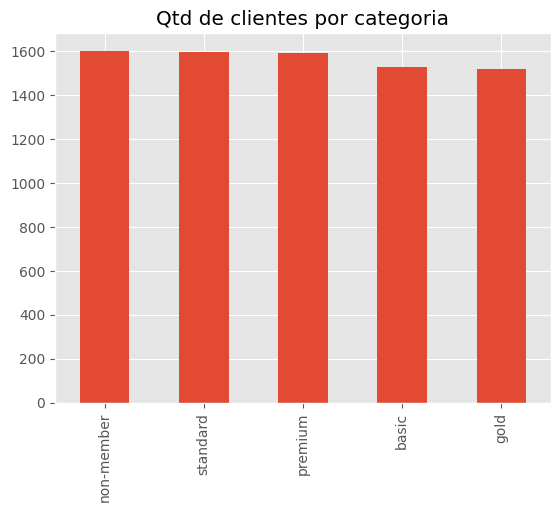

In [23]:
df_vendas.drop_duplicates(subset='transaction_id').customer_type.value_counts().plot(kind='bar')
plt.title('Qtd de clientes por categoria')

- Quais os tipos de pagamento que aceitamos? Quais os mais utilizados?

In [9]:
print(f"Aceitamos {len(df_vendas.payment_type.unique())} tipos de pagamento, sendo eles: {df_vendas.payment_type.unique()}")

Aceitamos 4 tipos de pagamento, sendo eles: ['e-wallet' 'debit card' 'cash' 'credit card']


Text(0.5, 1.0, 'Tipos de pagamento mais utilizados')

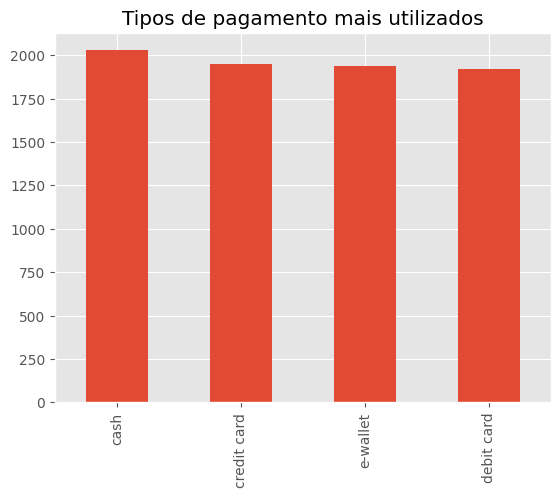

In [25]:
df_vendas.payment_type.value_counts().plot(kind = 'bar')
plt.title('Tipos de pagamento mais utilizados')

- Quais as categorias de produtos com que trabalhamos? Quais as que mais vendem?

Possuímos 22 categorias de produtos, sendo elas: ['fruit' 'vegetables' 'refrigerated items' 'frozen' 'spices and herbs'
 'canned foods' 'packaged foods' 'condiments and sauces' 'beverages'
 'dairy' 'cheese' 'meat' 'seafood' 'baked goods' 'baking' 'snacks'
 'baby products' 'pets' 'personal care' 'medicine' 'kitchen'
 'cleaning products']


Text(0.5, 1.0, 'Tipos de produtos mais vendidos')

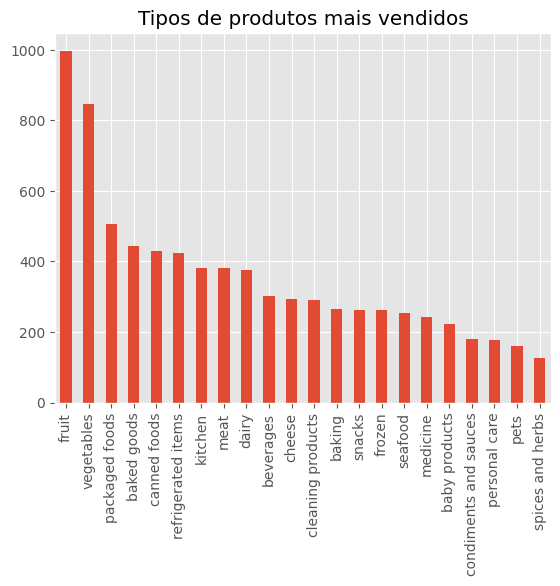

In [29]:
print(f"Possuímos {len(df_vendas.category.unique())} categorias de produtos, sendo elas: {df_vendas.category.unique()}")
df_vendas.category.value_counts().plot(kind='bar')
plt.title('Tipos de produtos mais vendidos')

- Qual a distribuição dos preços? E das compras realizadas?

Text(0.5, 0, 'Preço')

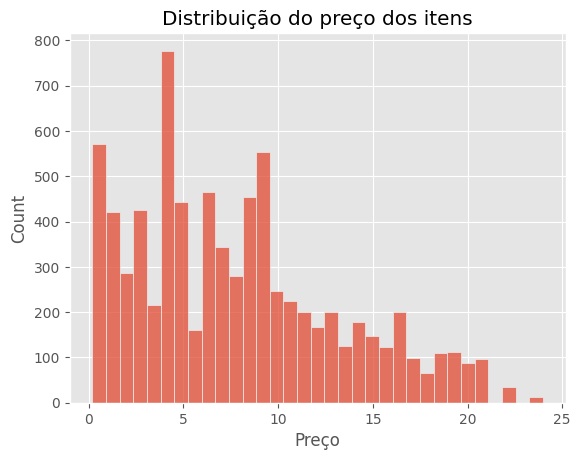

In [30]:
# Verificando a distribuição
sns.histplot(df_vendas.unit_price)
plt.title('Distribuição do preço dos itens')
plt.xlabel('Preço')

In [38]:
print(f"Em média, um cliente gasta {df_vendas.groupby('transaction_id')['total'].sum().mean()} reais em produtos,\
 em contrapartida, a mediana é de {df_vendas.groupby('transaction_id')['total'].sum().median()} reais.")

Em média, um cliente gasta 19.70990547962703 reais em produtos, em contrapartida, a mediana é de 14.97 reais.


Text(0.5, 1.0, 'Distribuição da qtd gasta por transação')

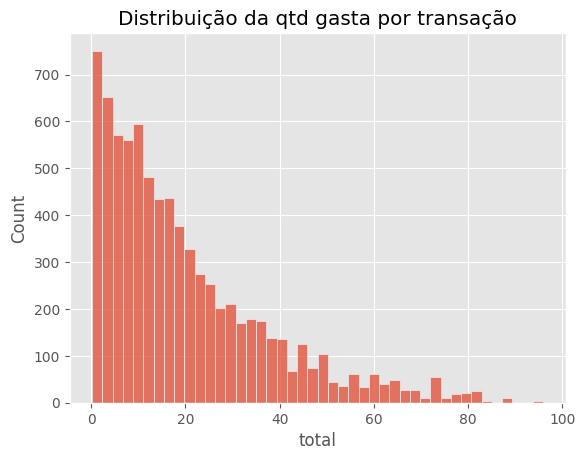

In [39]:
# Distribuição do valor das transações
sns.histplot(df_vendas.groupby('transaction_id')['total'].sum())
plt.title('Distribuição da qtd gasta por transação')

- Qual a menor quantidade de itens comprados em uma transação? E a maior? Qual a média?

In [41]:
print(f"Em média, as compras possuem {df_vendas.groupby('transaction_id')['quantity'].sum().mean()} itens.")
print(f"Na menor compra, {df_vendas.groupby('transaction_id')['quantity'].sum().min()} item foi levado.")
print(f"Na maior compra, {df_vendas.groupby('transaction_id')['quantity'].sum().max()} itens foram levados.")

Em média, as compras possuem 2.501596627921829 itens.
Na menor compra, 1 item foi levado.
Na maior compra, 4 itens foram levados.


Text(0.5, 0, 'Qtd itens')

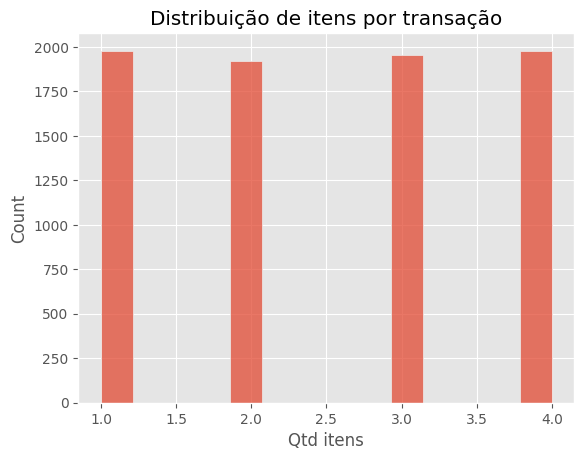

In [43]:
# Verificando a distribuição
sns.histplot(df_vendas.groupby('transaction_id').quantity.sum())
plt.title('Distribuição de itens por transação')
plt.xlabel('Qtd itens')

### Análise Bivariada

- Qual o total de vendas por categoria de produto?


<Axes: xlabel='category'>

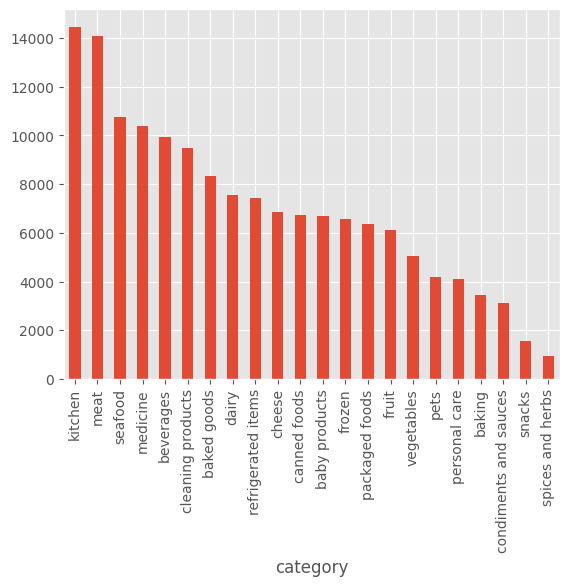

In [80]:
df_vendas.groupby('category').total.sum().sort_values(ascending=False).plot(kind='bar')

- Qual o total de vendas por tipo de consumidor?

<Axes: xlabel='customer_type'>

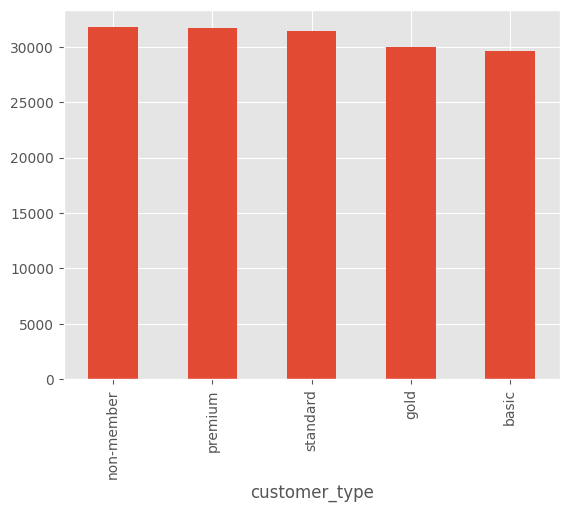

In [81]:
df_vendas.groupby('customer_type').total.sum().sort_values(ascending=False).plot(kind='bar')

- Há alguma relação entre a quantidade de itens por transação e o seu total?

<Axes: xlabel='quantity', ylabel='total'>

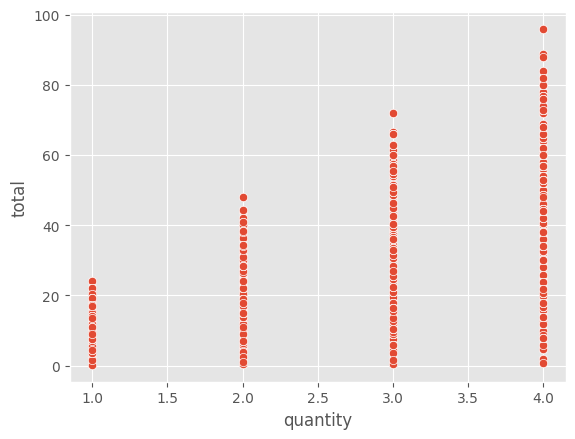

In [82]:
sns.scatterplot(df_vendas, x='quantity', y='total')

### Juntando as tabelas

In [132]:
# Lendos os dados
df_vendas = pl.read_csv('../data/raw/sales.csv')
df_level_estoque = pl.read_csv('../data/raw/sensor_stock_levels.csv')
df_temperatura = pl.read_csv('../data/raw/sensor_storage_temperature.csv')

In [52]:
# Verificando as dimensões dos datasets
print(f'df_vendas: {df_vendas.shape}')
print(f'df_level_estoque: {df_level_estoque.shape}')
print(f'df_temperatura: {df_temperatura.shape}')

df_vendas: (7829, 10)
df_level_estoque: (15000, 5)
df_temperatura: (23890, 4)


- O número de registros nas tabelas dos sensores é bem superior aos de vendas

Temos um problema aqui! Como dito anteriormente, o número de registros nas tabelas dos sensores é superior à de vendas, fazendo com que a periodicidade entre as tabelas sejam diferentes, impossibilitando uma junção correta entre as tabelas. Para resolver isso irei alterar o timestamp apenas para data e hora sem minutos, pois como definido no problema, os sensores realizarão medidas hora a hora.

Como a transformação funcionará:
 
06/05/2020 19:45 -> 06/05/2020 19:00
<br>
09/04/2019 16:10 -> 09/04/2019 16:00
<br>
19/10/2021 09:30 -> 19/10/2021 09:00


In [52]:
pd.to_datetime(df_vendas['timestamp'].str.slice(0, 13))

0      2022-03-02 09:00:00
1      2022-03-06 10:00:00
2      2022-03-04 17:00:00
3      2022-03-02 17:00:00
4      2022-03-05 14:00:00
               ...        
7824   2022-03-03 18:00:00
7825   2022-03-04 19:00:00
7826   2022-03-03 14:00:00
7827   2022-03-04 15:00:00
7828   2022-03-06 13:00:00
Name: timestamp, Length: 7829, dtype: datetime64[ns]